In [1]:
using Plots, LinearAlgebra, SparseArrays, Printf

# Exercise 2.6 (a)

In [2]:
using LinearAlgebra
using SparseArrays
using Plots

# Function to solve the BVP u''(x) + u(x) = 0
function solve_bvp(a, b, α, β, m1)
    # Set up the grid
    m2 = m1 + 1  # total number of points
    h = (b - a) / m1  # grid spacing
    x = collect(range(a, stop=b, length=m2))  # grid points
   # x = range(a, stop=b, length=m2) |> collect

    
    # Set up the matrix A (sparse matrix)
    A = zeros(m2, m2)

    # Internal points (A)
    for i in 2:m1
        A[i, i-1] = 1 / h^2
        A[i, i]   = -2 / h^2 + 1  # 1 ---> +u(x) term
        A[i, i+1] = 1 / h^2
    end

    # Boundary conditions (Dirichlet)
    A[1, 1] = 1  # u(a) = α
    A[m2, m2] = 1  # u(b) = β

    # Right-hand side vector F
    F = zeros(m2)
    F[1] = α  # Apply boundary condition at x = a
    F[m2] = β  # Apply boundary condition at x = b

    # Solving the linear system A * U = F for U
    U = A \ F

    # Returning grid points and computed solution
    return x, U
end

solve_bvp (generic function with 1 method)

In [3]:
# Plot the numerical solution and compare it to the exact solution
function plot_solution(a, b, α, β, m1)
    # Numerical solution
    x, U = solve_bvp(a, b, α, β, m1)

    # Exact solution 
    exact_solution = α * cos.(x) + (β - α * cos(b)) / sin(b) * sin.(x)

    # Plot of the numerical solution
    plot(x, U, label="Numerical Solution", marker=:o, xlabel="x", ylabel="u(x)", legend=:topleft)
    
    # Plot of the exact solution
    plot!(x, exact_solution, label="Exact Solution", linestyle=:dash)
end



plot_solution (generic function with 1 method)

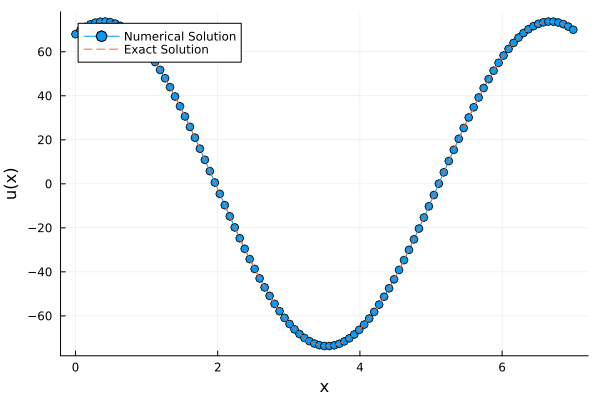

In [4]:
# Solving part (a) with a = 0, b = 1, α = 2, β = 3
a = 0
b = 7
α = 68
β = 70
m1 = 100  # Number of grid intervals 

plot_solution(a, b, α, β, m1)


# Exercise 2.6 (b)

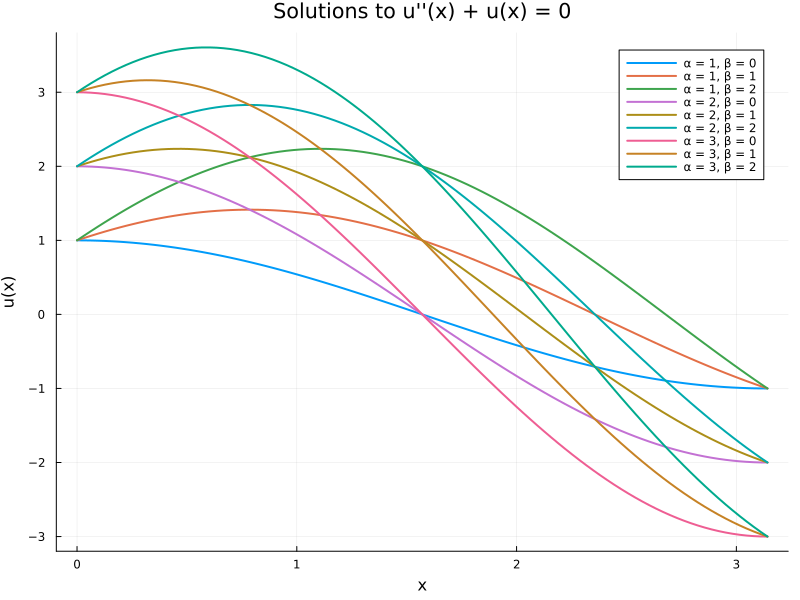

In [5]:
# Function to solve the BVP u''(x) + u(x) = 0 
function generate_solution(α, β)
    # Define the solution function u(x) = α * cos(x) + β * sin(x)
    u(x) = α * cos(x) + β * sin(x)
    return u
end

# Plotting function to visualize multiple solutions on a single plot
function plot_all_solutions(α_vals, β_vals)
    a = 0           # Left boundary (x = 0)
    b = π           # Right boundary (x = π)

    # Initialize a plot
    p = plot(size=(800, 600), xlabel="x", ylabel="u(x)", 
             title="Solutions to u''(x) + u(x) = 0", legend=:topright)

    # Generate points to plot the solution
    x_vals = range(a, stop=b, length=100)  # 100 points from 0 to π

    # Plot each solution on the same plot
    for α in α_vals
        for β in β_vals
            # Generate the solution function
            u = generate_solution(α, β)

            # Compute u(x) for all points
            u_vals = u.(x_vals)

            # Plot the solution with a label for the legend
            plot!(p, x_vals, u_vals, label="α = $α, β = $β", lw=2)
        end
    end

    # Display the plot
    display(p)
end

# Example usage: Define a range of α and β values
α_vals = [1, 2, 3]  # Vary α
β_vals = [0, 1, 2]  # Vary β

# Call the plotting function
plot_all_solutions(α_vals, β_vals)


# Exercise 2.6 (c)

In [6]:
using SparseArrays
using LinearAlgebra
using Plots

# Function to solve the boundary value problem using finite differences
function solve_bvp_fdm(a, b, α, β, m1)
    m2 = m1 + 1  # Total number of points including boundaries
    h = (b - a) / m1  # Grid spacing
    x = collect(range(a, stop=b, length=m2))  # Grid points

    # Set up the matrix A (sparse matrix for efficiency)
    A = spzeros(m2, m2)

    # Fill the matrix for interior points using the finite difference scheme
    for i in 2:m1
        A[i, i-1] = 1 / h^2
        A[i, i]   = -2 / h^2 + 1
        A[i, i+1] = 1 / h^2
    end

    # Boundary conditions (Dirichlet)
    A[1, 1] = 1  # u(0) = α
    A[m2, m2] = 1  # u(b) = β

    # Right-hand side vector F
    F = zeros(m2)
    F[1] = α  # Apply boundary condition at x = a
    F[m2] = β  # Apply boundary condition at x = b

    # Solve the linear system A * U = F for U
    U = A \ F

    # Return grid points and computed solution
    return x, U
end

# Function to plot the solution and study the convergence as h -> 0
function plot_bvp_convergence(a, b, α, β, m1_values)
    for (i, m1) in enumerate(m1_values)
        # Solve the BVP for each grid size
        x, U = solve_bvp_fdm(a, b, α, β, m1)
        
        # Plot the solution
        if i == 1
            plot(x, U, label="m1 = $m1", xlabel="x", ylabel="u(x)", legend=:topright)
        else
            plot!(x, U, label="m1 = $m1")
        end
    end

    # Add a title to the plot
    title!("Solutions as h -> 0")
end



plot_bvp_convergence (generic function with 1 method)

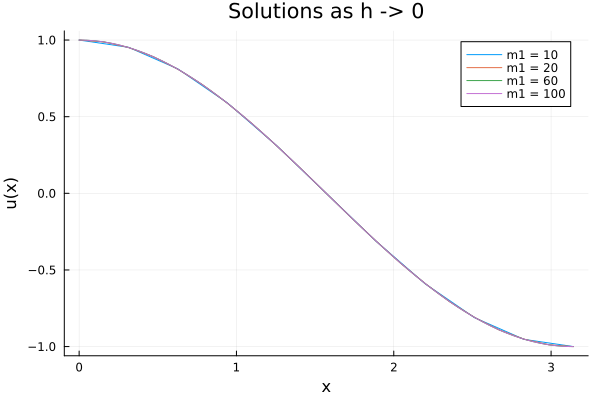

In [7]:
# Solving the BVP with u(0) = 1 and u(π) = -1
a = 0
b = π
α = 1.0  # Boundary condition at x = 0
β = -1.0  # Boundary condition at x = π

# Different grid sizes to study convergence
m1_values = [10, 20, 60, 100]  # Different numbers of intervals

# Plotting the convergence for u(π) = -1
plot_bvp_convergence(a, b, α, β, m1_values)



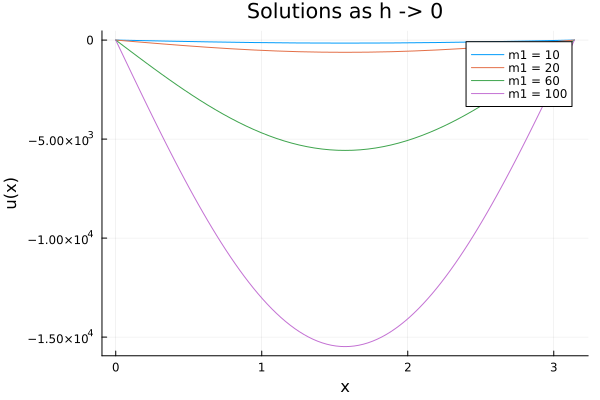

In [8]:

# Now changing the boundary condition to u(π) = 1 and plot again
β = 1.0  # New boundary condition at x = π
plot_bvp_convergence(a, b, α, β, m1_values)


# Exercise 2.6 (d)

In [9]:
# Part 1: BVP matrix function and eigenvalue/norm evaluation

# Function to solve BVP matrix
function solve_bvp_matrix(a, b, α, β, m1)
    # Set up the grid
    m2 = m1 + 1  # total number of points
    h = (b - a) / m1  # grid spacing

    # The matrix A (sparse matrix)
    A = zeros(m2, m2)

    # Internal points (A)
    for i in 2:m1
        A[i, i-1] = 1 / h^2
        A[i, i]   = -2 / h^2 + 1  # +1 is from +u(x) term
        A[i, i+1] = 1 / h^2
    end

    # Boundary conditions (Dirichlet)
    A[1, 1] = 1  # u(a) = α
    A[m2, m2] = 1  # u(b) = β

    # Return the matrix A and the grid spacing h
    return A, h
end

# Function to evaluate eigenvalues
function evals(m, A::Function)
    a, b = 0, 2  # Define the interval for the BVP
    α, β = 1, 3  # Dirichlet boundary conditions (can be changed)

    # Get matrix A and h
    A, h = A(a, b, α, β, m)

    # Compute the eigenvalues
    e = eigen(A).values
    return e
end

# Function of the norm of the inverse matrix
function aNorm(m, A::Function)
    a, b = 0, 2  # Define the interval for the BVP
    α, β = 1, 3  # Dirichlet boundary conditions (can be changed)

    # Matrix A and h
    A, h = A(a, b, α, β, m)

    # The norm of the inverse
    n = norm(inv(A), 2)
    return n
end



aNorm (generic function with 1 method)

In [16]:
using LinearAlgebra

function generate_matrix(h)
    # Let's create a tridiagonal matrix with values dependent on h
    A = Tridiagonal(fill(1.0, h-1), fill(-2.0 + 1/h, h), fill(1.0, h-1))
    return Matrix(A)
end

# Function of eigenvalues and matrix inverse norm
function investigate_matrix(h)
    A = generate_matrix(h)
    
    # Eigenvalues
    eigenvalues = eigen(A).values
    
    # Minimum eigenvalue (in magnitude)
    min_eigenvalue = minimum(abs.(eigenvalues))
    
    # Norms
    #norm_1 = norm(inv(A), 1)        # 1-norm
    norm_2 = norm(inv(A), 2)        # 2-norm
    #norm_inf = norm(inv(A), Inf)    # Infinity-norm
    
    return min_eigenvalue, norm_2
end

# Checking for different values of h
hs = [10, 100, 1000]  # Values of h approaching 0
#n = 1/h  # Size 

for h in hs
    min_eigen, norm_2 = investigate_matrix(h)
    println("h = $(1/h)")
    println("Minimum absolute eigenvalue: $min_eigen")
    println("2-Norm of inverse matrix: $norm_2")
    println("-----------")
end


h = 0.1
Minimum absolute eigenvalue: 0.01898594722899481
2-Norm of inverse matrix: 52.91541095973669
-----------
h = 0.01
Minimum absolute eigenvalue: 0.0012986959380370646
2-Norm of inverse matrix: 820.8249752120897
-----------
h = 0.001
Minimum absolute eigenvalue: 1.5091371533947117e-5
2-Norm of inverse matrix: 66887.63757040478
-----------
